# Movie recommendation system using collaborative filtering

## Dataset treatment

In [1]:
import pandas as pd

df = pd.read_csv('data/MovieLens_data/ratings.csv')
df.drop('timestamp', axis=1, inplace=True)
print(df)

          userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[20000263 rows x 3 columns]


In [2]:
# saving the cleaned dataset
df.to_csv('data/final_data/ratings.csv', index=False)

Since the dataset is organized, there is no need to make any changes to it. The only thing that was done was to remove the timestamp column, which is not necessary for the analysis. And at the end of the process, the cleaned dataset was saved in a new file.
The results will come in the form of a Movie id and the estimated rating for that movie by the user. The results (movie id) will be search in the movies.csv file to get the movie title for the estimated score.

## Exploratory Data Analysis

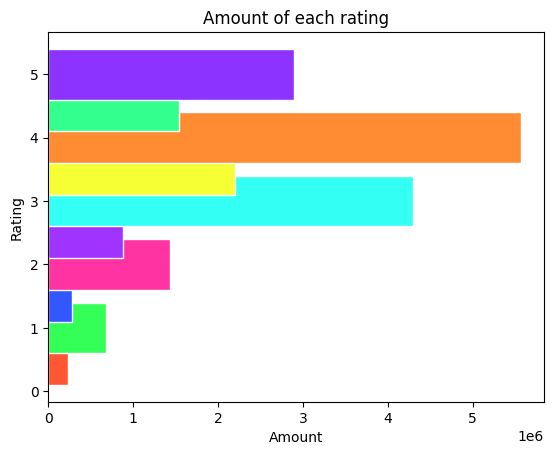

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset

reader = Reader()
data = Dataset.load_from_df(df, reader)

rating_counts = df['rating'].value_counts().sort_index()

# Plotting the horizontal bar chart with custom colors
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF', '#33FFF5', '#F5FF33', '#FF8C33', '#33FF8C', '#8C33FF']
plt.barh(rating_counts.index, rating_counts.values, edgecolor='white', color=colors)
plt.xlabel('Amount')
plt.ylabel('Rating')
plt.title('Amount of each rating')
plt.show()

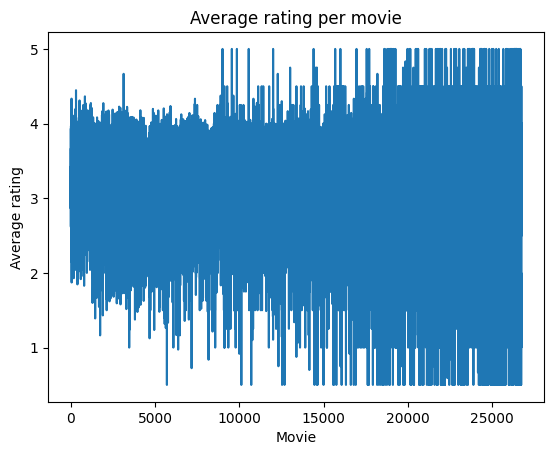

In [4]:
# plotting average rating per movie by movie year
average_rating = df.groupby('movieId')['rating'].mean()

plt.plot(average_rating.values)
plt.xlabel('Movie')
plt.ylabel('Average rating')
plt.title('Average rating per movie')
plt.show()

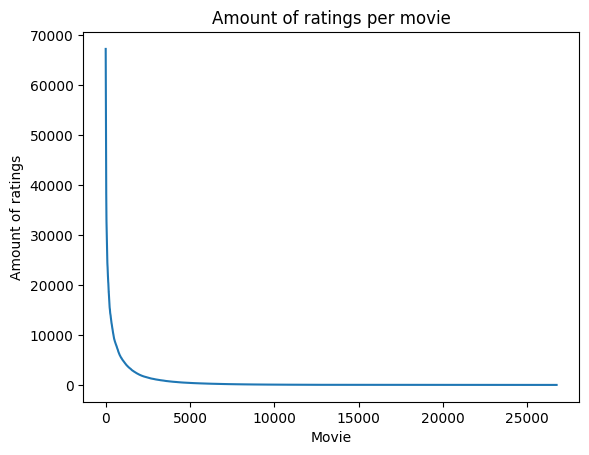

In [5]:
# plotting the amount of ratings per movie
rating_counts = df['movieId'].value_counts()

plt.plot(rating_counts.values)
plt.xlabel('Movie')
plt.ylabel('Amount of ratings')
plt.title('Amount of ratings per movie')
plt.show()

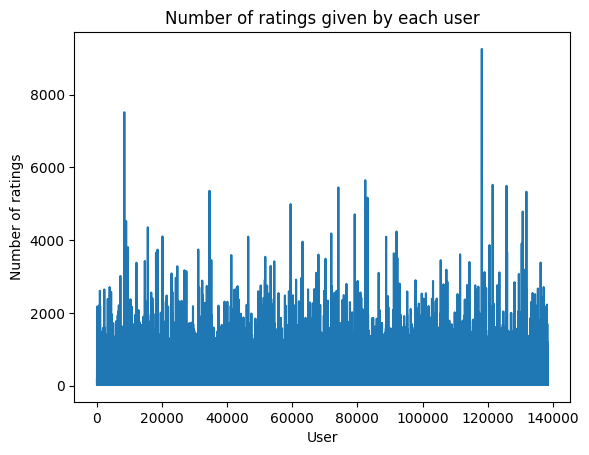

In [7]:
# plotting the average amount of ratings given by user
average_ratings_per_user = df.groupby('userId')['rating'].count()

plt.plot(average_ratings_per_user.values)
plt.xlabel('User')
plt.ylabel('Number of ratings')
plt.title('Number of ratings given by each user')
plt.show()

## Joining the information from movies.csv to make a complete movies dataset

### Merging the datasets for the movie titles, id and links

In [48]:
import pandas as pd

# load the datasets
df = pd.read_csv('data/MovieLens_data/ratings.csv')
df.drop('timestamp', axis=1, inplace=True)
movies = pd.read_csv('data/MovieLens_data/movies.csv')
movies_links = pd.read_csv("data/MovieLens_data/links.csv")

# merge the datasets on 'movieId'
merged_df = df.merge(movies[['movieId', 'title']], on='movieId')

# select only 'movieId' and 'title' columns
final_df = merged_df[['movieId', 'title']]

# merge with the links dataset to get the imdbId and tmdbId
final_df = final_df.merge(movies_links[['movieId', 'imdbId', 'tmdbId']], on='movieId')

# making the tmdbId a integer
final_df['tmdbId'] = final_df['tmdbId'].astype('Int64')

# removing the title from the final_df
final_df.drop('title', axis=1, inplace=True)

final_df

,movieId,imdbId,tmdbId
0,2,113497,8844
1,29,112682,902
2,32,114746,63
3,47,114369,807
4,50,114814,629
...,...,...,...
20000258,68954,1049413,14160
20000259,69526,1055369,8373
20000260,69644,1080016,8355
20000261,70286,1136608,17654


In [49]:
# saving the organized dataset
final_df.to_csv('data/final_data/movies_ids.csv', index=False)

### Merging Imdb dataset information for full movies data

In [52]:
import pandas as pd

# joining the information from movies.csv to make a complete movies dataset
imdb_movies = pd.read_csv('data/Imdb_data/title.basics.tsv', sep='\t', low_memory=False)

# change all \N entries to NaN
imdb_movies.replace(r'\N', pd.NA, inplace=True)
imdb_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
11136774,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,<NA>,"Action,Drama,Family"
11136775,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,<NA>,"Action,Drama,Family"
11136776,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,<NA>,"Action,Drama,Family"
11136777,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27,Short


In [53]:
# see all possible title types
print(imdb_movies['titleType'].unique())

# see all possible genres
print(imdb_movies['genres'].unique())

# join short and tvShort into short
imdb_movies.replace({'titleType': {'tvShort': 'short'}}, inplace=True)

# join movie and tvMovie into movies
imdb_movies.replace({'titleType': {'tvMovie': 'movies'}}, inplace=True)

['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']
['Documentary,Short' 'Animation,Short' 'Animation,Comedy,Romance' ...
 'Biography,Crime,Fantasy' 'Mystery,Reality-TV,Thriller'
 'Musical,Reality-TV,Talk-Show']


In [54]:
import pandas as pd

# replace tconst with imdbId
imdb_movies['tconst'] = imdb_movies['tconst'].str[2:]
imdb_movies.rename(columns={'tconst': 'imdbId'}, inplace=True)

# removing all 0s from start of the imdbId
imdb_movies['imdbId'] = imdb_movies['imdbId'].str.lstrip('0')

print(imdb_movies.columns)
imdb_movies

Index(['imdbId', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


,imdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,2,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,3,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,5,"Animation,Comedy,Romance"
3,4,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,5,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
11136774,9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,<NA>,"Action,Drama,Family"
11136775,9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,<NA>,"Action,Drama,Family"
11136776,9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,<NA>,"Action,Drama,Family"
11136777,9916856,short,The Wind,The Wind,0,2015,<NA>,27,Short


In [55]:
# saving the organized dataset
imdb_movies.to_csv('data/final_data/imdb_movies.csv', index=False)

### Getting the episode information

In [40]:
import pandas as pd

# Load the datasets
imdb_episodes = pd.read_csv('data/Imdb_data/title.episode.tsv', sep='\t', low_memory=False)

# change all \N to NaN
imdb_episodes.replace(r'\\N', pd.NA, inplace=True)

# change tconst to imdbId
imdb_episodes['tconst'] = imdb_episodes['tconst'].str[2:]

# change parentTconst to parentImdbId
imdb_episodes['parentTconst'] = imdb_episodes['parentTconst'].str[2:]

# rename the columns
imdb_episodes.rename(columns={'tconst': 'imdbId', 'parentTconst': 'parentImdbId'}, inplace=True)

# change all \N to NaN
imdb_episodes.replace(r'\N', pd.NA, inplace=True)

# remove all 0s from the start of the imdbId and parentImdbId
imdb_episodes['imdbId'] = imdb_episodes['imdbId'].str.lstrip('0')
imdb_episodes['parentImdbId'] = imdb_episodes['parentImdbId'].str.lstrip('0')

# remove episodes with season \N or episode \N
imdb_episodes = imdb_episodes[imdb_episodes['seasonNumber'].notna()]
imdb_episodes = imdb_episodes[imdb_episodes['episodeNumber'].notna()]

print(imdb_episodes.columns)
imdb_episodes

Index(['imdbId', 'parentImdbId', 'seasonNumber', 'episodeNumber'], dtype='object')


,imdbId,parentImdbId,seasonNumber,episodeNumber
1,41951,41038,1,9
2,42816,989125,1,17
4,43426,40051,3,42
5,43631,989125,2,16
6,43693,989125,2,8
...,...,...,...,...
8550903,9916846,1289683,3,18
8550904,9916848,1289683,3,17
8550905,9916850,1289683,3,19
8550906,9916852,1289683,3,20


In [41]:
# saving the organized dataset
imdb_episodes.to_csv('data/final_data/imdb_episodes.csv', index=False)

### Getting the information from all movies together

In [63]:
import pandas as pd

# Correlating the movies rated in the MovieLens dataset with the movies from the imdb dataset
movies = pd.read_csv('data/final_data/imdb_movies.csv', low_memory=False) # contains all info on movies from imdb
links = pd.read_csv('data/final_data/movies_ids.csv', low_memory=False) # contains the movieId, imdbId and tmdbId

# merging by imdbId
movies = movies.merge(links, on='imdbId')

# remove movies with same imdbId
movies = movies.drop_duplicates(subset='imdbId')

movies

,imdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,movieId,tmdbId
0,5,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short",95541,16624.0
4,8,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,NaN,1,"Documentary,Short",88674,105158.0
11,10,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,NaN,1,"Documentary,Short",120869,774.0
12,12,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,NaN,1,"Documentary,Short",98981,160.0
28,14,short,The Waterer Watered,L'arroseur arrosé,0.0,1895.0,NaN,1,"Comedy,Short",113048,82120.0
...,...,...,...,...,...,...,...,...,...,...,...
19984851,4377918,movie,Crazy Beautiful You,Crazy Beautiful You,0.0,2015.0,NaN,114,"Comedy,Drama,Romance",130089,327225.0
19984852,4397346,movie,Bikes vs Cars,Bikes vs Cars,0.0,2015.0,NaN,90,Documentary,129822,324260.0
19984856,4438688,movie,Polskie gówno,Polskie gówno,0.0,2014.0,NaN,93,"Comedy,Musical",128734,NaN
19984857,4475970,short,Power Rangers,Power Rangers,0.0,2015.0,NaN,14,"Action,Sci-Fi,Short",130842,327029.0


In [64]:
# saving the organized dataset
movies.to_csv('data/final_data/movies.csv', index=False)

In [61]:
import pandas as pd

# Correlating the episodes rated in the MovieLens dataset with the episodes from the imdb dataset (if there are any)
episodes = pd.read_csv('data/final_data/imdb_episodes.csv', low_memory=False) # contains all info on episodes from imdb
links = pd.read_csv('data/final_data/movies_ids.csv', low_memory=False) # contains the movieId, imdbId and tmdbId

# merging by imdbId
episodes = episodes.merge(links, on='imdbId')

# removing episodes with same imdbId
episodes = episodes.drop_duplicates(subset='imdbId')

episodes

,imdbId,parentImdbId,seasonNumber,episodeNumber,movieId,tmdbId
0,59020,58853,6,3,119194,263640.0
1,64725,65327,1,0,110339,391069.0
2,64725,65327,1,0,110339,391069.0
3,64725,65327,1,0,110339,391069.0
4,64725,65327,1,0,110339,391069.0
...,...,...,...,...,...,...
3677,4186390,907683,5,2,122147,315362.0
3678,4300028,1408430,2,28,130466,328346.0
3679,4300028,1408430,2,28,130466,328346.0
3680,4300028,1408430,2,28,130466,328346.0


### Getting the information from all movies together

In [72]:
# joining the movie.csv file with movie_details.csv by tmdbId
movie_details = pd.read_csv('data/final_data/movie_details.csv')
movies = pd.read_csv('data/final_data/movies.csv')

# rename id columns
movies.rename(columns={'tmdbId': 'tmdb_id'}, inplace=True)
movies.rename(columns={'imdbId': 'imdb_id'}, inplace=True)
movies.rename(columns={'movieId': 'movie_id'}, inplace=True)

# merging the datasets
movies = movies.merge(movie_details, on='tmdb_id')

# removing the title column
movies.drop('title', axis=1, inplace=True)

# putting all ids as starting columns
movies = movies[['movie_id', 'imdb_id', 'tmdb_id', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'backdrop_path', 'poster_path', 'original_language', 'overview', 'video']]

In [73]:
# pandas settings 
pd.set_option('future.no_silent_downcasting', True)

# replacing 1's and 0's with True and False in the isAdult column
movies['isAdult'] = movies['isAdult'].replace({1: True, 0: False})

# convert the tmdb_id column to Int64
movies['tmdb_id'] = movies['tmdb_id'].astype('Int64')

# removing missing values by filling them with a placeholder (e.g., pd.NA)
movies['runtimeMinutes'] = movies['runtimeMinutes'].fillna(pd.NA)

# convert the runtimeMinutes column to Int64
movies['runtimeMinutes'] = movies['runtimeMinutes'].astype('Int64')

# convert the startYear and endYear columns to Int64
movies['startYear'] = movies['startYear'].astype('Int64')
movies['endYear'] = movies['endYear'].astype('Int64')

# replace xx entries in original_language with NaN
movies['original_language'] = movies['original_language'].replace('xx', pd.NA)

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video
0,95541,5,16624,Blacksmith Scene,Blacksmith Scene,False,1893,<NA>,1,"Comedy,Short",/mDD99APoTgMuNJrkmAfGicooJHa.jpg,/c76bs0S90EFhB5ww3i6DlYQTVk.jpg,<NA>,Three men hammer on an anvil and pass a bottle...,False
1,88674,8,105158,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,False,1894,<NA>,1,"Documentary,Short",/zaPZItgUO3xicz0QBqrDKNuPSbD.jpg,/s7fhher78hv1I5tKl7NbgnwsKha.jpg,<NA>,A man (Thomas Edison's assistant) takes a pinc...,False
2,120869,10,774,Leaving the Factory,La sortie de l'usine Lumière à Lyon,False,1895,<NA>,1,"Documentary,Short",/wNxy6Fqvjh0FsIuk7cgqNNq5PhP.jpg,/cT2sefAXgEoICJUCEM6UfxXfuDM.jpg,fr,Working men and women leave through the main g...,False
3,98981,12,160,The Arrival of a Train,L'arrivée d'un train à La Ciotat,False,1896,<NA>,1,"Documentary,Short",/uusNog5m2aCuL53rrKw8RaBnprb.jpg,/m5HSlaNCzwV95rAriDmT19el5h1.jpg,fr,A group of people are standing along the platf...,False
4,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,<NA>,1,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26183,128624,4368334,323431,Petting Zoo,Petting Zoo,False,2015,<NA>,93,Drama,/m0RDGraOSHznV5q9GBLEmwz98Os.jpg,/11a3Gt9Q4X93hqfAsSItZ01oDwh.jpg,en,"A story of love, sex and teen pregnancy in San...",False
26184,127098,4368814,321594,Louis C.K.: Live at the Comedy Store,Louis C.K.: Live at the Comedy Store,False,2015,<NA>,66,Comedy,/b0gVgI3ptWba6xME5rmCuvFVw0.jpg,/9ULqaND2rzNFL4OAxCbSrY7UWem.jpg,en,This material was developed and prepared over ...,False
26185,130089,4377918,327225,Crazy Beautiful You,Crazy Beautiful You,False,2015,<NA>,114,"Comedy,Drama,Romance",/d8ubvqYoYKlnWyrTPmJd6A9Gv7m.jpg,/sZAi6bz8I31NrVPUAkza9qtxqZE.jpg,tl,A bad girl and a province boy found love in th...,False
26186,129822,4397346,324260,Bikes vs Cars,Bikes vs Cars,False,2015,<NA>,90,Documentary,/sV5Pk6zJR4Fsu8jtVDLN7BBjJUy.jpg,/8ARMq3gIxlzFcxSDQPSVmiE32KL.jpg,en,Bikes vs Cars depicts a global crisis that we ...,False


In [74]:
# dropping the videos column
movies.drop('video', axis=1, inplace=True)

# getting video info from the movie_videos.csv file
movie_videos = pd.read_csv('data/final_data/movie_videos.csv')

# renaming the video_key column to video
movie_videos.rename(columns={'video_key': 'video'}, inplace=True)

# merging the datasets
movies = movies.merge(movie_videos, on='tmdb_id')

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,<NA>,1,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,<NA>,13,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,<NA>,11,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk
3,86518,3419,28627,The Student of Prague,Der Student von Prag,False,1913,<NA>,85,"Drama,Fantasy,Horror",/pSrl9LPOKVGLh9DAvEaAwlpZAYz.jpg,/tO2zgNEY0MqtvEyPioTTfHgmN2Q.jpg,de,"Prague, Bohemia, 1820. Balduin, a penniless st...",LrqUenAgVBU
4,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,<NA>,12,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19819,127152,4257858,318224,Going Clear: Scientology & the Prison of Belief,Going Clear: Scientology and the Prison of Belief,False,2015,<NA>,119,Documentary,/29VoISagzOfJcuuhFzKQg9ZmEUU.jpg,/zWHQYR9srde9nZjU6Dot8qTjoni.jpg,en,GOING CLEAR intimately profiles eight former m...,ixgd38EZIR0
19820,130466,4300028,328346,I Hate Christian Laettner,I Hate Christian Laettner,False,2015,<NA>,90,"Biography,Documentary,History",/f4S4QdNVPDJn7TkTvjRoimOVzy0.jpg,/pdzT3ftIWJH7bdQyKI1gQS8SFgu.jpg,en,He made perhaps the most dramatic shot in the ...,HNk19TXqnq0
19821,128612,4358230,319999,Body,Cialo,False,2015,<NA>,90,"Comedy,Drama",/9Ro9GeYLc6JLHxUygYxpoYgBaZc.jpg,/ob1idQ0vpXxrEkUj03qKTom6hPn.jpg,pl,"A busy attorney, worried that his anorexic dau...",ZZ-3VAxWwnk
19822,127098,4368814,321594,Louis C.K.: Live at the Comedy Store,Louis C.K.: Live at the Comedy Store,False,2015,<NA>,66,Comedy,/b0gVgI3ptWba6xME5rmCuvFVw0.jpg,/9ULqaND2rzNFL4OAxCbSrY7UWem.jpg,en,This material was developed and prepared over ...,2Lcng7xgOzE


In [75]:
# getting score average for movies

# load the dataset
ratings = pd.read_csv('data/final_data/ratings.csv')

# removing movie entries that are not in the movies dataset
ratings = ratings[ratings['movieId'].isin(movies['movie_id'])]

# get the average rating for each movie
average_rating = ratings.groupby('movieId')['rating'].mean()

# merge the average rating with the movies dataset
movies = movies.merge(average_rating, left_on='movie_id', right_on='movieId')

# saving the organized dataset
movies.to_csv('data/final_data/movies_full.csv', index=False)

# saving the new ratings dataset
ratings.to_csv('data/final_data/ratings_full.csv', index=False)

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,<NA>,1,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4,2.250000
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,<NA>,13,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA,3.738189
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,<NA>,11,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk,3.340909
3,86518,3419,28627,The Student of Prague,Der Student von Prag,False,1913,<NA>,85,"Drama,Fantasy,Horror",/pSrl9LPOKVGLh9DAvEaAwlpZAYz.jpg,/tO2zgNEY0MqtvEyPioTTfHgmN2Q.jpg,de,"Prague, Bohemia, 1820. Balduin, a penniless st...",LrqUenAgVBU,3.250000
4,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,<NA>,12,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19819,127152,4257858,318224,Going Clear: Scientology & the Prison of Belief,Going Clear: Scientology and the Prison of Belief,False,2015,<NA>,119,Documentary,/29VoISagzOfJcuuhFzKQg9ZmEUU.jpg,/zWHQYR9srde9nZjU6Dot8qTjoni.jpg,en,GOING CLEAR intimately profiles eight former m...,ixgd38EZIR0,3.600000
19820,130466,4300028,328346,I Hate Christian Laettner,I Hate Christian Laettner,False,2015,<NA>,90,"Biography,Documentary,History",/f4S4QdNVPDJn7TkTvjRoimOVzy0.jpg,/pdzT3ftIWJH7bdQyKI1gQS8SFgu.jpg,en,He made perhaps the most dramatic shot in the ...,HNk19TXqnq0,3.000000
19821,128612,4358230,319999,Body,Cialo,False,2015,<NA>,90,"Comedy,Drama",/9Ro9GeYLc6JLHxUygYxpoYgBaZc.jpg,/ob1idQ0vpXxrEkUj03qKTom6hPn.jpg,pl,"A busy attorney, worried that his anorexic dau...",ZZ-3VAxWwnk,3.250000
19822,127098,4368814,321594,Louis C.K.: Live at the Comedy Store,Louis C.K.: Live at the Comedy Store,False,2015,<NA>,66,Comedy,/b0gVgI3ptWba6xME5rmCuvFVw0.jpg,/9ULqaND2rzNFL4OAxCbSrY7UWem.jpg,en,This material was developed and prepared over ...,2Lcng7xgOzE,3.800000


In [87]:
# adding the video key to the movies dataset
movies = pd.read_csv('data/final_data/movies_full.csv')
movie_videos = pd.read_csv('data/final_data/movie_videos.csv')

# merge on tmdb_id
movies = movies.merge(movie_videos, on='tmdb_id')

# saving movies dataset
movies.to_csv('data/final_data/movies_full_final.csv', index=False)

movies.drop('video_key_x', axis=1, inplace=True)
movies.drop('video_key_y', axis=1, inplace=True)

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating,video_key_x,video_key_y,video_key
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,NaN,1.0,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4,2.250000,KXf_Stwe_k4,KXf_Stwe_k4,KXf_Stwe_k4
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,NaN,13.0,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA,3.738189,JEGIyo-dKmA,JEGIyo-dKmA,JEGIyo-dKmA
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,NaN,11.0,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk,3.340909,In3mRDX0uqk,In3mRDX0uqk,In3mRDX0uqk
3,86518,3419,28627,The Student of Prague,Der Student von Prag,False,1913,NaN,85.0,"Drama,Fantasy,Horror",/pSrl9LPOKVGLh9DAvEaAwlpZAYz.jpg,/tO2zgNEY0MqtvEyPioTTfHgmN2Q.jpg,de,"Prague, Bohemia, 1820. Balduin, a penniless st...",LrqUenAgVBU,3.250000,LrqUenAgVBU,LrqUenAgVBU,LrqUenAgVBU
4,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,NaN,12.0,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc,3.500000,32pzHWUTcPc,32pzHWUTcPc,32pzHWUTcPc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,127152,4257858,318224,Going Clear: Scientology & the Prison of Belief,Going Clear: Scientology and the Prison of Belief,False,2015,NaN,119.0,Documentary,/29VoISagzOfJcuuhFzKQg9ZmEUU.jpg,/zWHQYR9srde9nZjU6Dot8qTjoni.jpg,en,GOING CLEAR intimately profiles eight former m...,ixgd38EZIR0,3.600000,ixgd38EZIR0,ixgd38EZIR0,ixgd38EZIR0
20156,130466,4300028,328346,I Hate Christian Laettner,I Hate Christian Laettner,False,2015,NaN,90.0,"Biography,Documentary,History",/f4S4QdNVPDJn7TkTvjRoimOVzy0.jpg,/pdzT3ftIWJH7bdQyKI1gQS8SFgu.jpg,en,He made perhaps the most dramatic shot in the ...,HNk19TXqnq0,3.000000,HNk19TXqnq0,HNk19TXqnq0,HNk19TXqnq0
20157,128612,4358230,319999,Body,Cialo,False,2015,NaN,90.0,"Comedy,Drama",/9Ro9GeYLc6JLHxUygYxpoYgBaZc.jpg,/ob1idQ0vpXxrEkUj03qKTom6hPn.jpg,pl,"A busy attorney, worried that his anorexic dau...",ZZ-3VAxWwnk,3.250000,ZZ-3VAxWwnk,ZZ-3VAxWwnk,ZZ-3VAxWwnk
20158,127098,4368814,321594,Louis C.K.: Live at the Comedy Store,Louis C.K.: Live at the Comedy Store,False,2015,NaN,66.0,Comedy,/b0gVgI3ptWba6xME5rmCuvFVw0.jpg,/9ULqaND2rzNFL4OAxCbSrY7UWem.jpg,en,This material was developed and prepared over ...,2Lcng7xgOzE,3.800000,2Lcng7xgOzE,2Lcng7xgOzE,2Lcng7xgOzE


In [91]:
# check if dataset is complete
movies_final = pd.read_csv('data/final_data/movies_full_final.csv')

movies_final.drop('video_key_x', axis=1, inplace=True)
movies_final.drop('video_key_y', axis=1, inplace=True)

movies_final.to_csv('data/final_data/movies_full_final.csv', index=False)

movies_final

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating,video_key
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,NaN,1.0,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4,2.250000,KXf_Stwe_k4
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,NaN,13.0,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA,3.738189,JEGIyo-dKmA
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,NaN,11.0,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk,3.340909,In3mRDX0uqk
3,86518,3419,28627,The Student of Prague,Der Student von Prag,False,1913,NaN,85.0,"Drama,Fantasy,Horror",/pSrl9LPOKVGLh9DAvEaAwlpZAYz.jpg,/tO2zgNEY0MqtvEyPioTTfHgmN2Q.jpg,de,"Prague, Bohemia, 1820. Balduin, a penniless st...",LrqUenAgVBU,3.250000,LrqUenAgVBU
4,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,NaN,12.0,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc,3.500000,32pzHWUTcPc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,127152,4257858,318224,Going Clear: Scientology & the Prison of Belief,Going Clear: Scientology and the Prison of Belief,False,2015,NaN,119.0,Documentary,/29VoISagzOfJcuuhFzKQg9ZmEUU.jpg,/zWHQYR9srde9nZjU6Dot8qTjoni.jpg,en,GOING CLEAR intimately profiles eight former m...,ixgd38EZIR0,3.600000,ixgd38EZIR0
20156,130466,4300028,328346,I Hate Christian Laettner,I Hate Christian Laettner,False,2015,NaN,90.0,"Biography,Documentary,History",/f4S4QdNVPDJn7TkTvjRoimOVzy0.jpg,/pdzT3ftIWJH7bdQyKI1gQS8SFgu.jpg,en,He made perhaps the most dramatic shot in the ...,HNk19TXqnq0,3.000000,HNk19TXqnq0
20157,128612,4358230,319999,Body,Cialo,False,2015,NaN,90.0,"Comedy,Drama",/9Ro9GeYLc6JLHxUygYxpoYgBaZc.jpg,/ob1idQ0vpXxrEkUj03qKTom6hPn.jpg,pl,"A busy attorney, worried that his anorexic dau...",ZZ-3VAxWwnk,3.250000,ZZ-3VAxWwnk
20158,127098,4368814,321594,Louis C.K.: Live at the Comedy Store,Louis C.K.: Live at the Comedy Store,False,2015,NaN,66.0,Comedy,/b0gVgI3ptWba6xME5rmCuvFVw0.jpg,/9ULqaND2rzNFL4OAxCbSrY7UWem.jpg,en,This material was developed and prepared over ...,2Lcng7xgOzE,3.800000,2Lcng7xgOzE


In [11]:
import pandas as pd

people = pd.read_csv('data/Imdb_data/name.basics.tsv', sep='\t', low_memory=False)

# drop all columns except nconst and primaryName
people = people[['nconst', 'primaryName']]

# dropping all rows with NaN values
people = people.dropna()

crew = pd.read_csv('data/Imdb_data/title.crew.tsv', sep='\t', low_memory=False)

# dropping the writers column
crew = crew.drop('writers', axis=1)

# change all \N to NaN
crew.replace(r'\N', pd.NA, inplace=True)

# drop all rows with NaN values
crew = crew.dropna()

# rename directors column to nconst
crew.rename(columns={'directors': 'nconst'}, inplace=True)

# join the crew dataset with the people dataset
crew = crew.merge(people, on='nconst')

# drop the nconst column
crew = crew.drop('nconst', axis=1)

# renaming the primaryName column to directors
crew.rename(columns={'primaryName': 'directors'}, inplace=True)

# renaming the tconst column to imdbId
crew.rename(columns={'tconst': 'imdb_id'}, inplace=True)

# remove all 0s and tt from the start of the imdbId
crew['imdb_id'] = crew['imdb_id'].str[2:]
crew['imdb_id'] = crew['imdb_id'].str.lstrip('0')

# saving the directors dataset
crew.to_csv('data/final_data/directors.csv', index=False)

crew

,imdb_id,directors
0,1,William K.L. Dickson
1,2,Émile Reynaud
2,3,Émile Reynaud
3,4,Émile Reynaud
4,5,William K.L. Dickson
...,...,...
5212708,9916848,Hamdi Alkan
5212709,9916850,Hamdi Alkan
5212710,9916852,Hamdi Alkan
5212711,9916856,Johan Planefeldt


### Adding the actors and directors to the movies dataset

In [12]:
import pandas as pd

people = pd.read_csv('data/Imdb_data/name.basics.tsv', sep='\t', low_memory=False)

# drop all columns except nconst and primaryName
people = people[['nconst', 'primaryName']]

# dropping all rows with NaN values
people = people.dropna()

principals = pd.read_csv('data/Imdb_data/title.principals.tsv', sep='\t', low_memory=False)

# drop not necessary columns
principals = principals.drop(['ordering', 'job', 'characters'], axis=1)

# get only the actors and actresses in the category column
actors = principals[principals['category'].isin(['actor', 'actress'])]

# dropping the category column
actors = actors.drop('category', axis=1)

# rename the tconst column to imdbId
actors.rename(columns={'tconst': 'imdb_id'}, inplace=True)

# join the actors dataset with the people dataset
actors = actors.merge(people, on='nconst')

# drop the nconst column
actors = actors.drop('nconst', axis=1)

# removing all 0s and tt from the start of the imdb_id
actors['imdb_id'] = actors['imdb_id'].str[2:]
actors['imdb_id'] = actors['imdb_id'].str.lstrip('0')

# saving the actors dataset
actors.to_csv('data/final_data/actors.csv', index=False)

actors

,imdb_id,primaryName
0,5,Charles Kayser
1,5,John Ott
2,7,James J. Corbett
3,7,Peter Courtney
4,8,Fred Ott
...,...,...
36914895,9916880,Joanna Ruiz
36914896,9916880,Joanna Ruiz
36914897,9916880,Joanna Ruiz
36914898,9916880,Emma Tate


#### Merging the actors and directors with the movies dataset

In [17]:
import pandas as pd

# merging the actors and directors datasets with the movies dataset

# load the movies dataset
movies = pd.read_csv('data/final_data/movies_full_final.csv')
# load the directors dataset
directors = pd.read_csv('data/final_data/directors.csv')
# load the actors dataset
actors = pd.read_csv('data/final_data/actors.csv')

# join the actors of same movies
actors = actors.groupby('imdb_id')['primaryName'].apply(lambda x: ','.join(x)).reset_index()

# join the directors of same movies
directors = directors.groupby('imdb_id')['directors'].apply(lambda x: ','.join(x)).reset_index()

# merge the datasets
movies = movies.merge(directors, on='imdb_id')
movies = movies.merge(actors, on='imdb_id')

# saving the organized dataset
movies.to_csv('data/final_data/movies_full_final_v2.csv', index=False)

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating,video_key,directors,primaryName
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,NaN,1.0,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4,2.250000,KXf_Stwe_k4,Louis Lumière,"François Clerc,Benoît Duval"
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,NaN,13.0,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA,3.738189,JEGIyo-dKmA,Georges Méliès,"Georges Méliès,Georges Méliès,Victor André,Ble..."
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,NaN,11.0,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk,3.340909,In3mRDX0uqk,Edwin S. Porter,"Gilbert M. 'Broncho Billy' Anderson,Gilbert M...."
3,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,NaN,12.0,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc,3.500000,32pzHWUTcPc,Winsor McCay,"Winsor McCay,George McManus,Roy L. McCardell,T..."
4,93333,4936,53410,The Bank,The Bank,False,1915,NaN,25.0,"Comedy,Short",/zN0gtbECZBHOw4qiMrmDxUwdLm5.jpg,/3L6YgCq5vR9wUgaKy1MzpeqrN9X.jpg,en,A janitor at a bank is in love with a secretar...,A9w36CH5krQ,2.700000,A9w36CH5krQ,Charles Chaplin,"Charles Chaplin,Edna Purviance,Billy Armstrong..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17766,122147,4186390,315362,Familjen,Familjen,False,2015,NaN,90.0,"Crime,Mystery,Thriller",/xnzsml50TUShiNqDjbxg8qIbSkg.jpg,/fF30DiIwFp14Od9yvpcETI6tXIq.jpg,sv,When a well-known crime boss is murdered by a ...,815mgtrILMY,2.250000,815mgtrILMY,Mårten Klingberg,"Peter Haber,Mikael Persbrandt,Ingvar Hirdwall,..."
17767,129826,4189260,322456,Lego DC Comics Super Heroes: Justice League vs...,Lego DC Comics Super Heroes: Justice League vs...,False,2015,NaN,49.0,"Action,Adventure,Animation",/pbUhiefOhOFaaK06UorRy2rvaGT.jpg,/bp0exZFHBLV0gWNXkBINtymOeom.jpg,en,"Superman’s clone, Bizarro, has become an embar...",V_Ye2lkTY54,2.500000,V_Ye2lkTY54,Brandon Vietti,"Diedrich Bader,Diedrich Bader,Troy Baker,Troy ..."
17768,125918,4189442,305932,Expelled,Expelled,False,2014,NaN,85.0,Comedy,/6L5vre1eJu0dppvk6kGfVuSGNyC.jpg,/9p7VzMhvchlA4WdpgAXBnFg7l2I.jpg,en,Felix is a legendary prankster who gets expell...,h42uyV8al30,2.666667,h42uyV8al30,Alex Goyette,"Cameron Dallas,Matt Shively,Lia Marie Johnson,..."
17769,126482,4191054,302429,Strange Magic,Strange Magic,False,2015,NaN,99.0,"Adventure,Animation,Comedy",/aUbyQhWcPS7S0Su2d9Tgk3NxdPk.jpg,/vjCdrK8gGRFnyuZb1j9BzgN2RaY.jpg,en,A love potion works its devious charms on fair...,E0HD-OAmHw0,3.125000,E0HD-OAmHw0,Gary Rydstrom,"Evan Rachel Wood,Elijah Kelley,Kristin Chenowe..."


### Filtering the information from all episodes to get only the needed episodes

In [41]:
# filtering only the needed episodes

episodes = pd.read_csv('data/final_data/imdb_episodes.csv')
parentMovies = pd.read_csv('data/final_data/movies_full.csv')

# removing episodes that are not in the movies dataset
episodes = episodes[episodes['parentImdbId'].isin(parentMovies['imdb_id'])]

episodes

,imdbId,parentImdbId,seasonNumber,episodeNumber
209517,744724,425674,1,6
230850,774467,425674,1,1
233783,779705,425674,1,2
233784,779706,425674,1,3
233785,779707,425674,1,4
...,...,...,...,...
5578239,5739638,109036,1,2
5620043,5918026,92571,1,3
5620047,5918044,92571,1,4
6225341,8044208,468988,1,1


In [47]:
import pandas as pd

# creating a new dataset to get unique seasons
seasons = episodes[['parentImdbId', 'seasonNumber']].drop_duplicates()

# create a season_id column
seasons['season_id'] = range(1, len(seasons) + 1)

# saving the organized dataset
seasons.to_csv('data/final_data/seasons.csv', index=False)

# load the final movies dataset
movies = pd.read_csv('data/final_data/movies_full_final_v2.csv')

# ensure both columns are of the same type (string)
movies['imdb_id'] = movies['imdb_id'].astype(str)
seasons['parentImdbId'] = seasons['parentImdbId'].astype(str)

# merge the datasets (movie and season)
movies = movies.merge(seasons, left_on='imdb_id', right_on='parentImdbId')

# drop the season number and parentImdbId columns
movies = movies.drop('seasonNumber', axis=1)
movies = movies.drop('parentImdbId', axis=1)

# saving the organized dataset
movies.to_csv('data/final_data/series_final.csv', index=False)

movies

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating,video_key,directors,primaryName,season_id
0,7396,70644,133919,Scenes from a Marriage,Scener ur ett äktenskap,False,1973,1973.0,51.0,Drama,/prQE97Ds6ElKtTuemJRCvGJFlZz.jpg,/ArKEdvJesIktFX8OAhcdKAOLl6I.jpg,sv,Johan and Marianne are married and seem to hav...,t3GgQyavR3w,4.083501,t3GgQyavR3w,Ingmar Bergman,"Liv Ullmann,Erland Josephson,Bibi Andersson,Gu...",18
1,114464,74621,17200,Helter Skelter,Helter Skelter,False,1976,1976.0,97.0,"Crime,Drama,Thriller",/wLHfFCz36xnIooBKVRFt3HDob8V.jpg,/t2GMGZFT6AKEocASzRRe2yoOkuK.jpg,en,The investigation of two horrific mass murders...,4jHxU3SsiNo,3.500000,4jHxU3SsiNo,Tom Gries,"George DiCenzo,Steve Railsback,Nancy Wolfe,Mar...",2
2,26444,81874,64353,The Hitch Hiker's Guide to the Galaxy,The Hitch Hiker's Guide to the Galaxy,False,1981,1981.0,152.0,"Adventure,Comedy,Sci-Fi",/vkioDzkjFv0xCWHOJ75Qx4XWIRf.jpg,/paOaEgnRu6eWraEwrpaE4yggpj5.jpg,en,An Earth Man and his alien friend escape an ex...,f8z4JAenBPo,3.617021,f8z4JAenBPo,Alan J.W. Bell,"Simon Jones,David Dixon,Peter Jones,Sandra Dic...",3
3,26528,88727,17663,Anne of Green Gables,Anne of Green Gables,False,1985,1985.0,100.0,"Drama,Family",/55ZkbGyz6ls1ie217rqGpybQAOB.jpg,/z1owlDzKO3DQpFKNFBnuQlPF891.jpg,en,At the turn of the century on Prince Edward Is...,CxBOwhANpcw,3.964361,CxBOwhANpcw,Kevin Sullivan,"Megan Follows,Colleen Dewhurst,Richard Farnswo...",21
4,74282,92571,40724,Anne of Avonlea,Anne of Green Gables: The Sequel,False,1987,1987.0,58.0,"Drama,Family,Romance",/fTW6w1aJl8aiWYdAJLyfhDXmDi2.jpg,/hofilKLz1UPR3nm7ooXXIdGhdTw.jpg,en,"Anne Shirley, now a schoolteacher, has begun w...",hK64_7dEO-w,3.905028,hK64_7dEO-w,Kevin Sullivan,"Megan Follows,Colleen Dewhurst,Marilyn Lightst...",24
5,54561,109036,2701,Abraham,Abraham,False,1993,1993.0,88.0,"Adventure,Biography,Drama",/qAn3yeKVBb1P7Ow3kR9mZmu8BvW.jpg,/ijuwCYAUTOrguvupsxQn6fhmxjv.jpg,en,"Rather than choosing a great leader or king, G...",3h-7-RS6YRI,2.333333,3h-7-RS6YRI,Joseph Sargent,"Richard Harris,Barbara Hershey,Maximilian Sche...",25
6,108947,117547,58427,Samson and Delilah,Samson and Delilah,False,1996,1996.0,172.0,"Adventure,Drama,History",/p3jUeLOxGUiHl49aGT8mYA3XMU3.jpg,/2KMiwP8m3t2qbnONGgDbyjdDXuY.jpg,en,Biblical strongman Samson falls prey to the vo...,3EFzr4tsTXE,3.250000,3EFzr4tsTXE,Nicolas Roeg,"Dennis Hopper,Elizabeth Hurley,Eric Thal,Jonat...",16
7,51559,137863,99259,Eight Fatal Shots,Kahdeksan surmanluotia,False,1972,1972.0,316.0,Drama,/vzRWwkk5jSpJxGVRkFwJbzr7fzR.jpg,/3u8xlj9cNhKTBlOlJUajHiW5yDB.jpg,fi,Small-scale farmer Pasi shoots four policemen ...,_OTIir6k0Ms,3.800000,_OTIir6k0Ms,Mikko Niskanen,"Tarja-Tuulikki Tarsala,Mikko Niskanen,Paavo Pe...",20
8,121792,210294,16174,Snow Queen,Snow Queen,False,2002,2002.0,90.0,"Adventure,Family,Fantasy",/cHSWE4nW0VyoTDHGgTEwFIDuEUq.jpg,/qufo7G0OTQs1hMtO7B5axnCdm4E.jpg,en,Since a bitter winter storm stole the life of ...,IEojXa6voVo,2.500000,IEojXa6voVo,David Wu,"Chelsea Hobbs,Jeremy Guilbaut,Robert Wisden,Wa...",8
9,126062,425674,67460,We Can Be Heroes,We Can Be Heroes,False,2005,2005.0,30.0,Comedy,NaN,/mZ0rApzGN73gSvmh4Pd2c5rGwKr.jpg,en,The story of five unique Australians who have ...,h0sSW3xBPUQ,3.000000,h0sSW3xBPUQ,Matthew Saville,"Chris Lilley,Chris Lilley,Chris Lilley,Jennife...",1


In [49]:
# drop from the movies final dataset the series in the series dataset
movies_final = pd.read_csv('data/final_data/movies_full_final_v2.csv')
series = pd.read_csv('data/final_data/series_final.csv')

# remove series from movies_final
movies_final = movies_final[~movies_final['imdb_id'].isin(series['imdb_id'])]

# rename primaryName column to actors
movies_final.rename(columns={'primaryName': 'actors'}, inplace=True)

# saving the organized dataset
movies_final.to_csv('data/final_data/movies_final_v3.csv', index=False)

movies_final

,movie_id,imdb_id,tmdb_id,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,backdrop_path,poster_path,original_language,overview,video,rating,video_key,directors,actors
0,113048,14,82120,The Waterer Watered,L'arroseur arrosé,False,1895,NaN,1.0,"Comedy,Short",/A0hONP6cxTthAsw6IvPMX4Aowkr.jpg,/rSZghvrFWTGqi4UecyG9jimzpEO.jpg,fr,"A gardener is watering his flowers, when a mis...",KXf_Stwe_k4,2.250000,KXf_Stwe_k4,Louis Lumière,"François Clerc,Benoît Duval"
1,32898,417,775,A Trip to the Moon,Le voyage dans la lune,False,1902,NaN,13.0,"Action,Adventure,Comedy",/jeC1kzwWnZTuXl7xF4E5D70BD8c.jpg,/9o0v5LLFk51nyTBHZSre6OB37n2.jpg,fr,Professor Barbenfouillis and five of his colle...,JEGIyo-dKmA,3.738189,JEGIyo-dKmA,Georges Méliès,"Georges Méliès,Georges Méliès,Victor André,Ble..."
2,49389,439,5698,The Great Train Robbery,The Great Train Robbery,False,1903,NaN,11.0,"Action,Adventure,Crime",/99uGRUGS2qxNvPARiM8dkuTrUnW.jpg,/vEYr1sJR1dOFGXwXawpBN6hDRGF.jpg,en,After the train station clerk is assaulted and...,In3mRDX0uqk,3.340909,In3mRDX0uqk,Edwin S. Porter,"Gilbert M. 'Broncho Billy' Anderson,Gilbert M...."
3,127054,4008,100246,Gertie the Dinosaur,Gertie the Dinosaur,False,1914,NaN,12.0,"Animation,Comedy,Family",/dJQJPvEqs3Yzvam3djqnLJNJ70S.jpg,/fH5c2a3Nti765GqG8jj0uMBLgIK.jpg,en,Although not the first feature-length animated...,32pzHWUTcPc,3.500000,32pzHWUTcPc,Winsor McCay,"Winsor McCay,George McManus,Roy L. McCardell,T..."
4,93333,4936,53410,The Bank,The Bank,False,1915,NaN,25.0,"Comedy,Short",/zN0gtbECZBHOw4qiMrmDxUwdLm5.jpg,/3L6YgCq5vR9wUgaKy1MzpeqrN9X.jpg,en,A janitor at a bank is in love with a secretar...,A9w36CH5krQ,2.700000,A9w36CH5krQ,Charles Chaplin,"Charles Chaplin,Edna Purviance,Billy Armstrong..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17766,122147,4186390,315362,Familjen,Familjen,False,2015,NaN,90.0,"Crime,Mystery,Thriller",/xnzsml50TUShiNqDjbxg8qIbSkg.jpg,/fF30DiIwFp14Od9yvpcETI6tXIq.jpg,sv,When a well-known crime boss is murdered by a ...,815mgtrILMY,2.250000,815mgtrILMY,Mårten Klingberg,"Peter Haber,Mikael Persbrandt,Ingvar Hirdwall,..."
17767,129826,4189260,322456,Lego DC Comics Super Heroes: Justice League vs...,Lego DC Comics Super Heroes: Justice League vs...,False,2015,NaN,49.0,"Action,Adventure,Animation",/pbUhiefOhOFaaK06UorRy2rvaGT.jpg,/bp0exZFHBLV0gWNXkBINtymOeom.jpg,en,"Superman’s clone, Bizarro, has become an embar...",V_Ye2lkTY54,2.500000,V_Ye2lkTY54,Brandon Vietti,"Diedrich Bader,Diedrich Bader,Troy Baker,Troy ..."
17768,125918,4189442,305932,Expelled,Expelled,False,2014,NaN,85.0,Comedy,/6L5vre1eJu0dppvk6kGfVuSGNyC.jpg,/9p7VzMhvchlA4WdpgAXBnFg7l2I.jpg,en,Felix is a legendary prankster who gets expell...,h42uyV8al30,2.666667,h42uyV8al30,Alex Goyette,"Cameron Dallas,Matt Shively,Lia Marie Johnson,..."
17769,126482,4191054,302429,Strange Magic,Strange Magic,False,2015,NaN,99.0,"Adventure,Animation,Comedy",/aUbyQhWcPS7S0Su2d9Tgk3NxdPk.jpg,/vjCdrK8gGRFnyuZb1j9BzgN2RaY.jpg,en,A love potion works its devious charms on fair...,E0HD-OAmHw0,3.125000,E0HD-OAmHw0,Gary Rydstrom,"Evan Rachel Wood,Elijah Kelley,Kristin Chenowe..."


In [46]:
import pandas as pd

# load the seasons original dataset


seasons

,parentImdbId,seasonNumber,season_id
0,425674,1,1
1,74621,1,2
2,81874,1,3
3,2033193,1,4
4,2033193,2,5
5,107228,1,6
6,2033193,3,7
7,210294,1,8
8,490048,1,9
9,108906,1,10


In [ ]:
# load the episodes dataset
episodes = pd.read_csv('data/final_data/imdb_episodes.csv')

# load the series dataset
series = pd.read_csv('data/final_data/series_final.csv')

# merge the datasets
episodes = episodes.merge(series, left_on='parentImdbId', right_on='imdb_id')



In [1]:
import pandas as pd

# load movies final dataset
movies = pd.read_csv('data/final_data/movies_final_v3.csv')

# get all possible genres
genres = movies['genres'].str.split(',').explode().unique()

print(genres)

['Comedy' 'Short' 'Action' 'Adventure' 'Crime' 'Animation' 'Family'
 'Drama' 'War' 'History' 'Western' 'Romance' 'Horror' 'Mystery' 'Thriller'
 'Fantasy' 'Sci-Fi' 'Documentary' 'Sport' 'Music' 'Musical' 'Biography'
 'Film-Noir' 'Adult' nan 'News']


In [4]:
# find all movies with a specific title
movies = pd.read_csv('data/final_data/movies_final_v3.csv')

# count all movies with the same movie_id
num = movies['movie_id'].value_counts()

# drop all movies with the same movie_id
movies = movies.drop_duplicates(subset='movie_id')

# save the organized dataset
movies.to_csv('data/final_data/movies_final_v3.csv', index=False)